In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df=pd.read_csv('Airline-Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
0,0,adria-airways,D Ito,Germany,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4,2015,1
1,1,adria-airways,Ron Kuhlmann,United States,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,2015,1
2,2,adria-airways,E Albin,Switzerland,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9,2014,1
3,3,adria-airways,Tercon Bojan,Singapore,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9,2014,1
4,4,adria-airways,L James,Poland,WAW-SKJ Economy. No free snacks or drinks on t...,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6,2014,0


In [4]:
df.shape

(27284, 15)

In [5]:
df2=pd.read_csv('Sampled.csv')

In [6]:
df2.sample(3)

,Unnamed: 0,Unnamed: 0.1,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
144,7256,10234,brussels-airlines,R Phillips,Belgium,BRU-Toulouse-BRU in B Flex economy +. Both fli...,Premium Economy,7.0,3.0,4.0,2.0,0.0,3.0,4,2012,0
889,10678,15399,emirates,Chang Zhou,China,I took the flight from Shanghai Pudong(PVG)-Du...,Economy,9.0,5.0,5.0,5.0,5.0,5.0,10,2014,1
1358,3450,4658,air-france,G Hirschfield,United Kingdom,Birmingham - Paris - Barcelona AF1065 AF1248 J...,Economy,1.0,1.0,1.0,1.0,1.0,1.0,6,2013,0


In [7]:
df.dtypes

Unnamed: 0                         int64
airline_name                      object
author                            object
author_country                    object
content                           object
cabin_flown                       object
overall_rating                   float64
seat_comfort_rating              float64
cabin_staff_rating               float64
food_beverages_rating            float64
inflight_entertainment_rating    float64
value_money_rating               float64
Month                              int64
Year                               int64
recommended                        int64
dtype: object

In [53]:
#converting recommended from numeric to boolean
df['recommended'] = df['recommended'].astype('bool')

In [8]:
# Checking for null values in the dataframe.
df.isnull().sum()

Unnamed: 0                       0
airline_name                     0
author                           0
author_country                   0
content                          0
cabin_flown                      0
overall_rating                   0
seat_comfort_rating              0
cabin_staff_rating               0
food_beverages_rating            0
inflight_entertainment_rating    0
value_money_rating               0
Month                            0
Year                             0
recommended                      0
dtype: int64

In [9]:
# Checking the columns of the reviews. These are all the features available to us
df.columns

Index(['Unnamed: 0', 'airline_name', 'author', 'author_country', 'content',
       'cabin_flown', 'overall_rating', 'seat_comfort_rating',
       'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'value_money_rating', 'Month', 'Year',
       'recommended'],
      dtype='object')

In [10]:
df=features = df.drop(['Unnamed: 0'], axis=1)

In [11]:
features.sample(5)

,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
6778,binter-canarias,S Matias,United Kingdom,Flew from Lisbon to Las Palmas on 29th Decembe...,Economy,8.0,4.0,4.0,5.0,0.0,4.0,1,2014,1
20872,singapore-airlines,D Fell,United Kingdom,I've just come back from a UK - Perth return t...,Economy,7.0,3.0,5.0,1.0,5.0,3.0,3,2014,0
26579,virgin-australia,A Sargeant,Australia,Melbourne - Canberra. Excellent service on an ...,Economy,9.0,4.0,5.0,3.0,1.0,5.0,9,2013,1
18664,qantas-airways,N Bettin,United Kingdom,So if you want to know what it would be like f...,Economy,2.0,2.0,2.0,2.0,3.0,1.0,1,2015,0
12457,finnair,L Roestad,Norway,Leisure flight from Oslo to Varadero (round-tr...,Economy,3.0,2.0,3.0,2.0,3.0,3.0,1,2013,0


In [12]:
#Checking the shape of the dataframe.
df.shape

(27284, 14)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27284 entries, 0 to 27283
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   27284 non-null  object 
 1   author                         27284 non-null  object 
 2   author_country                 27284 non-null  object 
 3   content                        27284 non-null  object 
 4   cabin_flown                    27284 non-null  object 
 5   overall_rating                 27284 non-null  float64
 6   seat_comfort_rating            27284 non-null  float64
 7   cabin_staff_rating             27284 non-null  float64
 8   food_beverages_rating          27284 non-null  float64
 9   inflight_entertainment_rating  27284 non-null  float64
 10  value_money_rating             27284 non-null  float64
 11  Month                          27284 non-null  int64  
 12  Year                           27284 non-null 

In [55]:
features = df.drop(['content', 'recommended', 'author', 'overall_rating'], axis=1)
features2 = df['content']
target = df['recommended']
target.value_counts()

1    16476
0    10808
Name: recommended, dtype: int64

In [57]:
features['author_country'] = LabelEncoder().fit_transform(features['author_country'])
features['cabin_flown'] = LabelEncoder().fit_transform(features['cabin_flown'])
features['airline_name'] = LabelEncoder().fit_transform(features['airline_name'])
features = StandardScaler().fit_transform(features)

In [58]:
features

array([[-1.67304538, -0.71168859,  0.10352198, ...,  0.40848532,
        -0.65394768,  1.3080537 ],
       [-1.67304538,  0.94985469, -1.43991714, ...,  1.10249576,
        -1.536968  ,  1.3080537 ],
       [-1.67304538,  0.7397745 ,  0.10352198, ...,  1.10249576,
         0.81775285,  0.30760694],
       ...,
       [ 1.59438022,  0.93075649,  0.10352198, ..., -0.28552511,
         1.11209296, -1.69328657],
       [ 1.59438022,  0.93075649,  0.10352198, ...,  0.40848532,
         1.11209296, -1.69328657],
       [ 1.59438022,  0.93075649,  0.10352198, ..., -0.97953555,
         1.11209296, -1.69328657]])

In [60]:
featuresdf=pd.DataFrame(features)
featuresdf

,0,1,2,3,4,5,6,7,8,9
0,-1.673045,-0.711689,0.103522,0.547794,0.326745,0.649150,-1.505390,0.408485,-0.653948,1.308054
1,-1.673045,0.949855,-1.439917,0.547794,1.011664,0.649150,-0.915760,1.102496,-1.536968,1.308054
2,-1.673045,0.739775,0.103522,1.287623,1.011664,0.649150,-1.505390,1.102496,0.817753,0.307607
3,-1.673045,0.567891,-1.439917,0.547794,0.326745,-0.010886,-0.915760,0.408485,0.817753,0.307607
4,-1.673045,0.376909,0.103522,0.547794,-1.043094,-1.330958,-0.326129,-0.979536,-0.065267,0.307607
...,...,...,...,...,...,...,...,...,...,...
27279,1.594380,0.930756,0.103522,-0.192034,-0.358174,-1.990995,-1.505390,1.102496,1.112093,-1.693287
27280,1.594380,0.930756,0.103522,-1.671692,-0.358174,-0.010886,-1.505390,-0.979536,1.112093,-1.693287
27281,1.594380,0.930756,0.103522,-0.931863,-1.728013,-1.990995,-1.505390,-0.285525,1.112093,-1.693287
27282,1.594380,0.930756,0.103522,-0.192034,0.326745,-0.670922,-0.915760,0.408485,1.112093,-1.693287


In [14]:
# Statistical analysis of the dataframe.
df.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
count,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000,27284.000000
mean,6.067879,3.259566,3.522944,3.016493,2.553108,3.411413,6.221742,2013.692530,0.603870
std,3.216066,1.351689,1.460053,1.515096,1.696009,1.440927,3.397493,0.999572,0.489101
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1970.000000,0.000000
25%,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2013.000000,0.000000
50%,7.000000,4.000000,4.000000,3.000000,3.000000,4.000000,6.000000,2014.000000,1.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,5.000000,9.000000,2014.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,2015.000000,1.000000


In [15]:
# Checking number of reviews for overall rating.
df["overall_rating"].value_counts()

10.0    4453
9.0     4008
8.0     3932
1.0     3906
7.0     2451
2.0     2271
5.0     1885
3.0     1782
6.0     1369
4.0     1227
Name: overall_rating, dtype: int64

From the above we find that most people in the dataset have rated the airlines highly. BUT the number of 1 star rating is also significant

In [16]:
df["recommended"].value_counts()

1    16476
0    10808
Name: recommended, dtype: int64

In [17]:
high_rating = df[df["overall_rating"]>5]
low_rating =df[df["overall_rating"]<=5]

In [18]:
high_rating["overall_rating"].value_counts()

10.0    4453
9.0     4008
8.0     3932
7.0     2451
6.0     1369
Name: overall_rating, dtype: int64

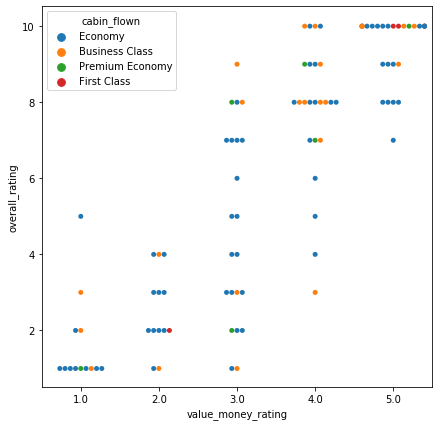

In [19]:
data4=df.sample(100)
plt.figure(figsize=(7,7))
sns.swarmplot(x=data4['value_money_rating'] , y=data4['overall_rating'] , hue=data4['cabin_flown'] )
plt.show()

In [21]:
data4.head(4)

,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
11106,etihad-airways,Chris Hauzenberg,Austria,VIE to Bkk via Abu Dhabi. Booked flight direct...,Economy,3.0,1.0,3.0,2.0,1.0,2.0,7,2015,False
24901,turkish-airlines,Adrian Kessler,Malaysia,Geneva-Istanbul (A319) - Istanbul-Kuala Lumpur...,Business Class,8.0,2.0,5.0,5.0,5.0,3.0,10,2013,True
5113,allegiant-air,R Chaudhry,United States,This airline is based on everything being a la...,Economy,8.0,4.0,5.0,3.0,5.0,5.0,12,2014,True
20749,singapore-airlines,C Murch,Hong Kong,I flew from HKG-SIN onboard a B777-300ER (9V-S...,Economy,7.0,3.0,4.0,4.0,4.0,3.0,10,2014,True


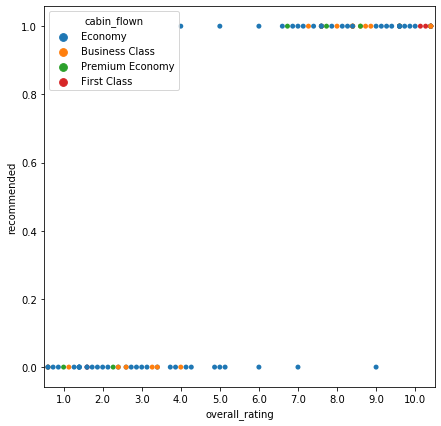

In [22]:
plt.figure(figsize=(7,7))
sns.swarmplot(x=data4['overall_rating'] , y=data4['recommended'] , hue=data4['cabin_flown'] )
plt.show()

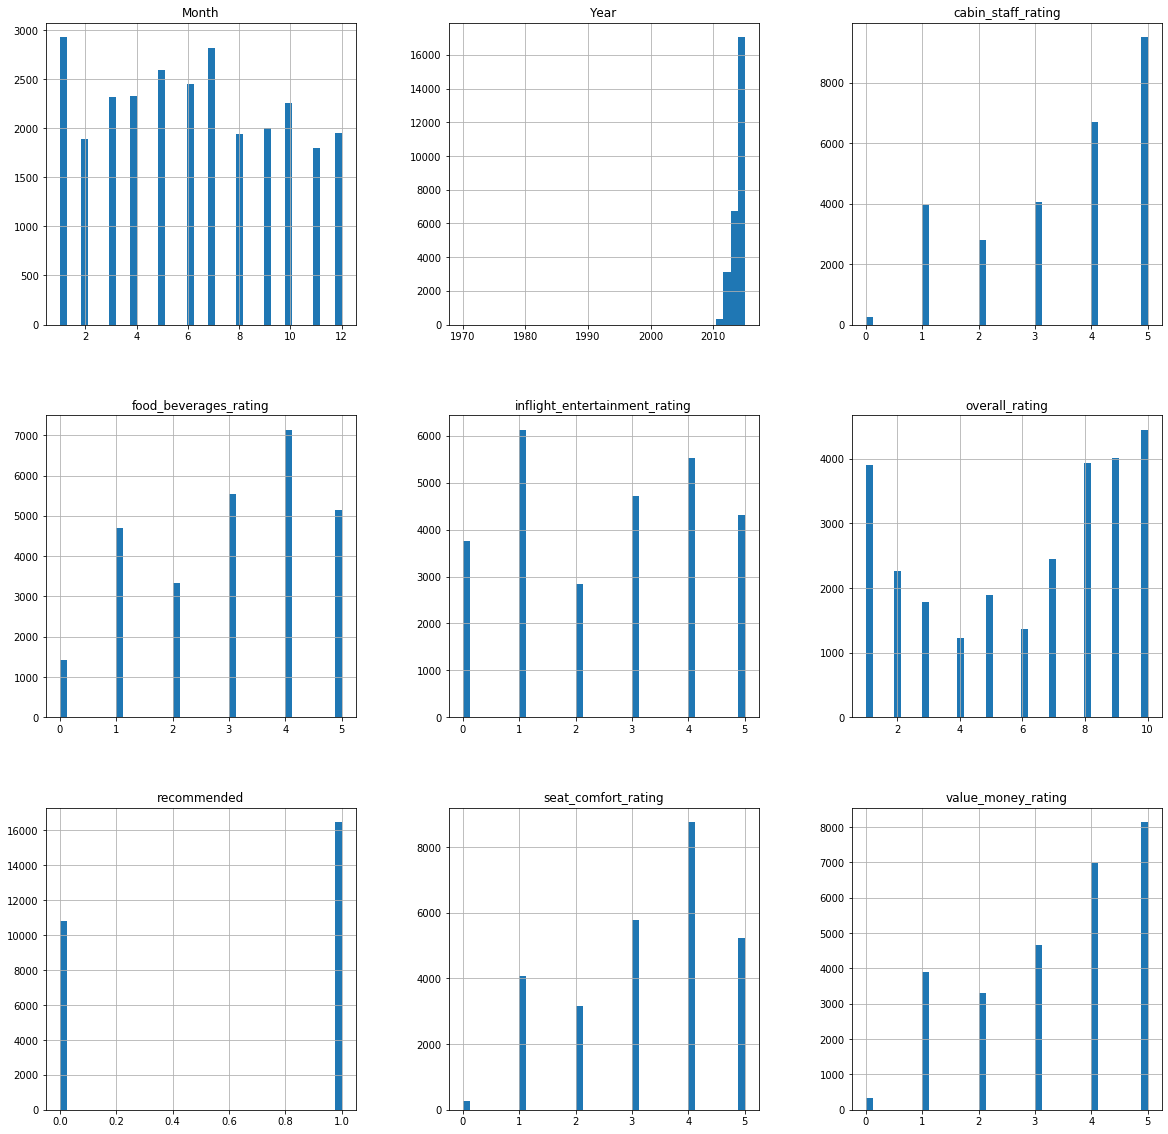

In [23]:
df.hist(bins=40 , figsize=(20,20)) #Pandas Hist functionplt.show()
plt.show()

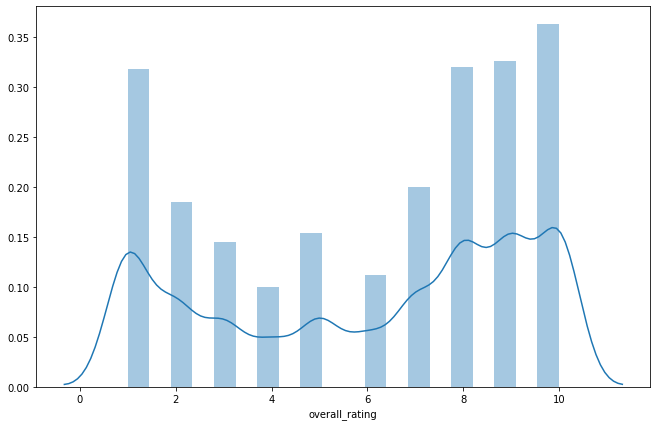

In [24]:
plt.figure(figsize=(11,7))
sns.distplot( df['overall_rating'] , bins=20)
plt.show()

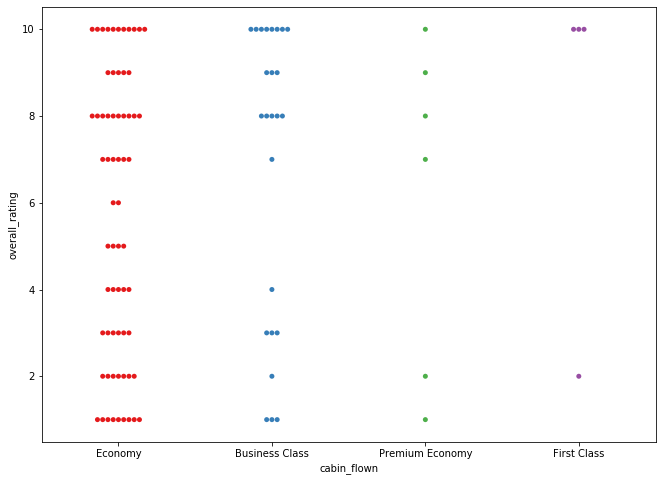

In [25]:
plt.figure(figsize=(11,8))
sns.swarmplot(x=data4['cabin_flown'] ,palette="Set1", y = data4['overall_rating'])
plt.show()

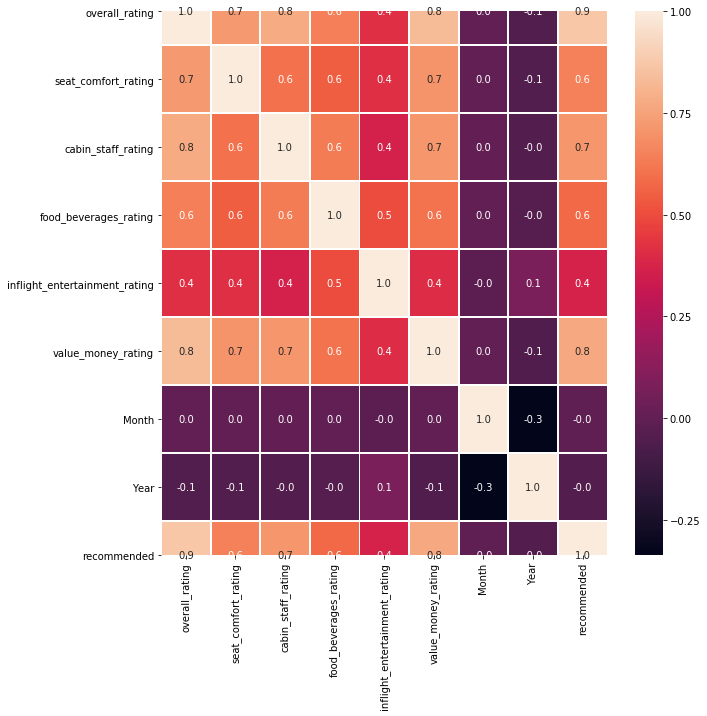

In [61]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True,linewidths=.8,  fmt= '.1f',ax=ax)
# sns.heatmap(df)
plt.show()

In [27]:
df['airline_name'].unique()

array(['adria-airways', 'aegean-airlines', 'aer-lingus',
       'aeroflot-russian-airlines', 'aerolineas-argentinas', 'aeromexico',
       'aerosur', 'aigle-azur', 'air-algerie', 'air-arabia', 'air-astana',
       'air-bagan', 'air-berlin', 'air-botswana', 'air-busan',
       'air-canada', 'air-canada-rouge', 'air-caraibes', 'air-china',
       'air-corsica', 'air-dolomiti', 'air-europa', 'air-france',
       'air-india', 'air-india-express', 'air-koryo', 'air-labrador',
       'air-macau', 'air-madagascar', 'air-malta', 'air-mauritius',
       'air-mediterranee', 'air-moldova', 'air-namibia',
       'air-new-zealand', 'air-niugini', 'air-nostrum', 'air-serbia',
       'air-seychelles', 'air-tahiti-nui', 'air-transat', 'air-vanuata',
       'air-zimbabwe', 'airasia', 'airasia-x', 'airasia-zest',
       'airbaltic', 'air-blue', 'aircalin', 'airnorth', 'alaska-airlines',
       'alitalia', 'allegiant-air', 'american-airlines', 'american-eagle',
       'ana-all-nippon-airways', 'anadoluje

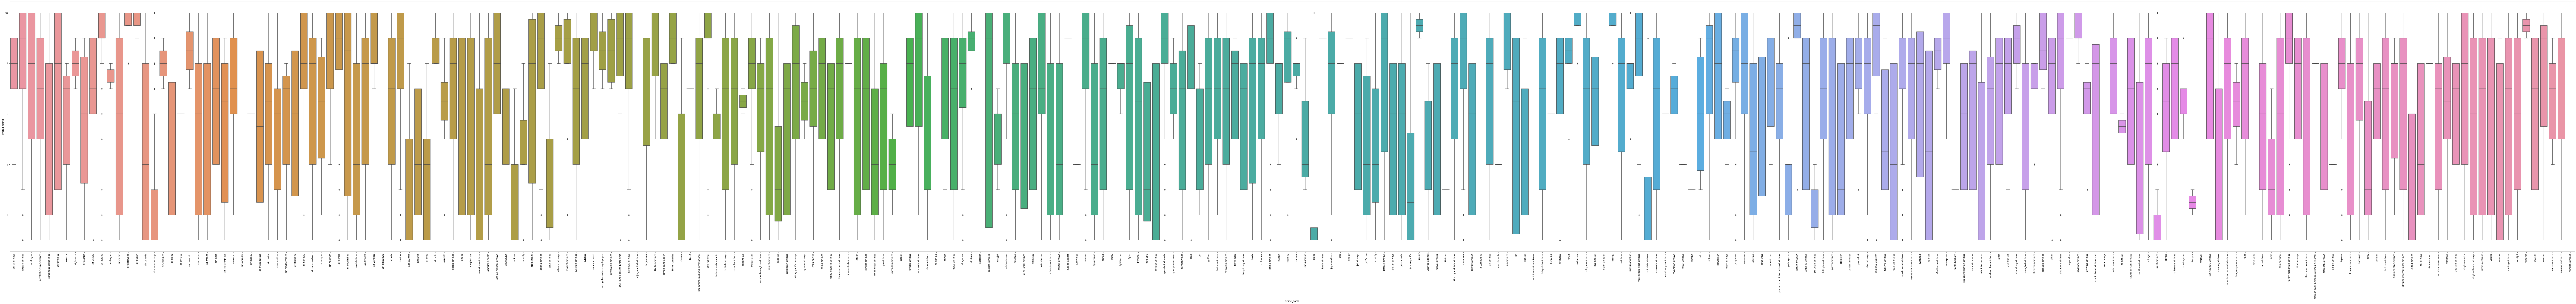

In [28]:
plt.figure(figsize=(200,20))
data1=df.loc[:,["airline_name","overall_rating"]]
sns.boxplot(x=data1.airline_name,y=data1.overall_rating)
plt.xticks(rotation=90)
plt.show()

In [29]:
df['cabin_flown'].unique()

array(['Economy', 'Business Class', 'Premium Economy', 'First Class'],
      dtype=object)

In [30]:
data2=df.loc[:,["airline_name","overall_rating","cabin_flown","seat_comfort_rating","cabin_staff_rating","food_beverages_rating","inflight_entertainment_rating","value_money_rating"]]

<Figure size 792x648 with 0 Axes>

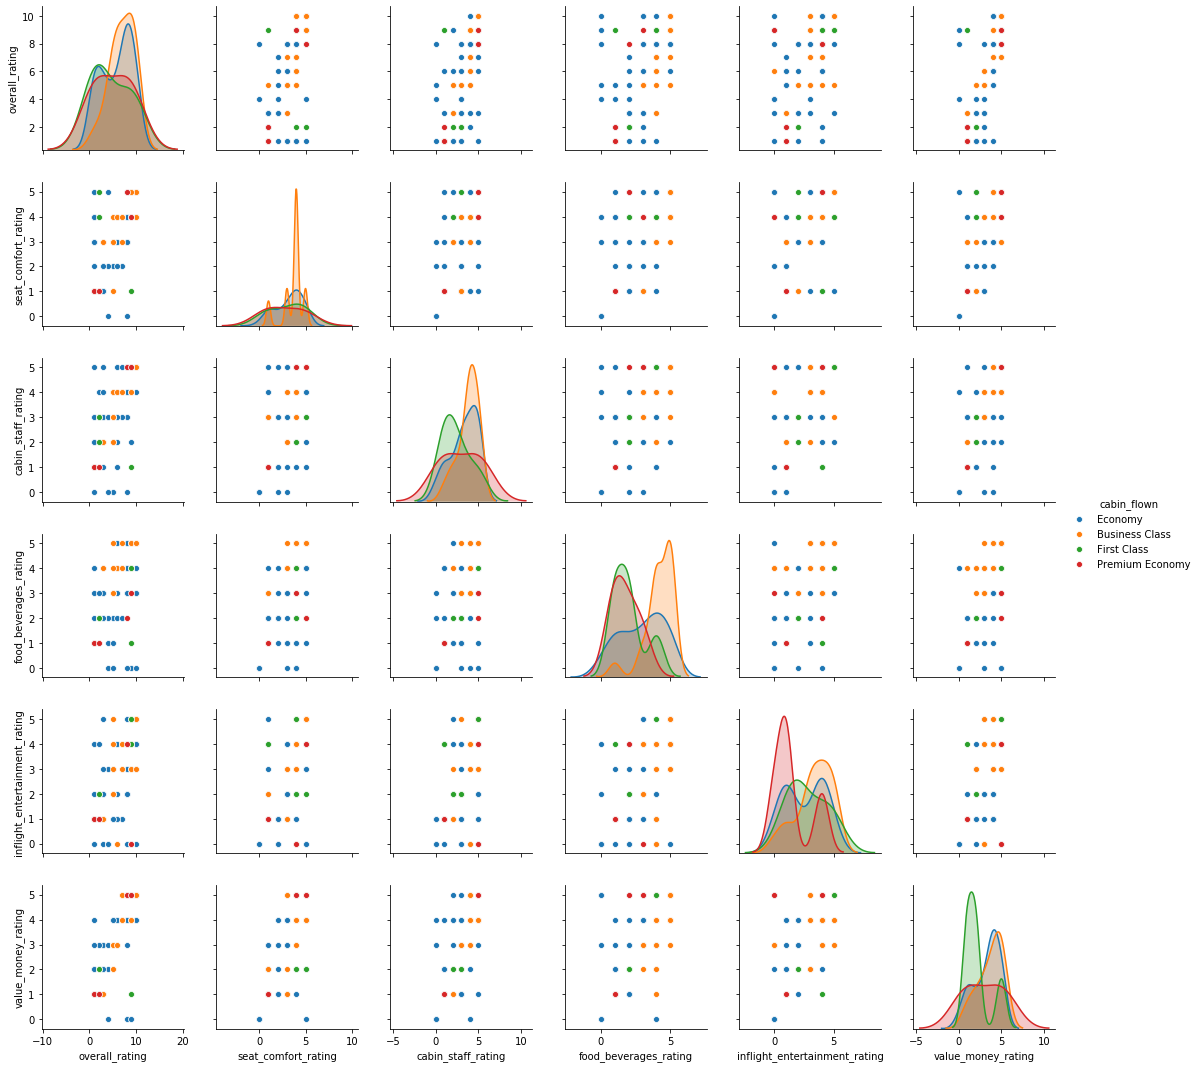

In [52]:
plt.figure(figsize=(11,9))
sns.pairplot(data2.sample(100),hue = 'cabin_flown')
plt.show()

In [32]:
data3=df.loc[:,["overall_rating","seat_comfort_rating","cabin_staff_rating","food_beverages_rating","inflight_entertainment_rating","value_money_rating"]]

<Figure size 792x648 with 0 Axes>

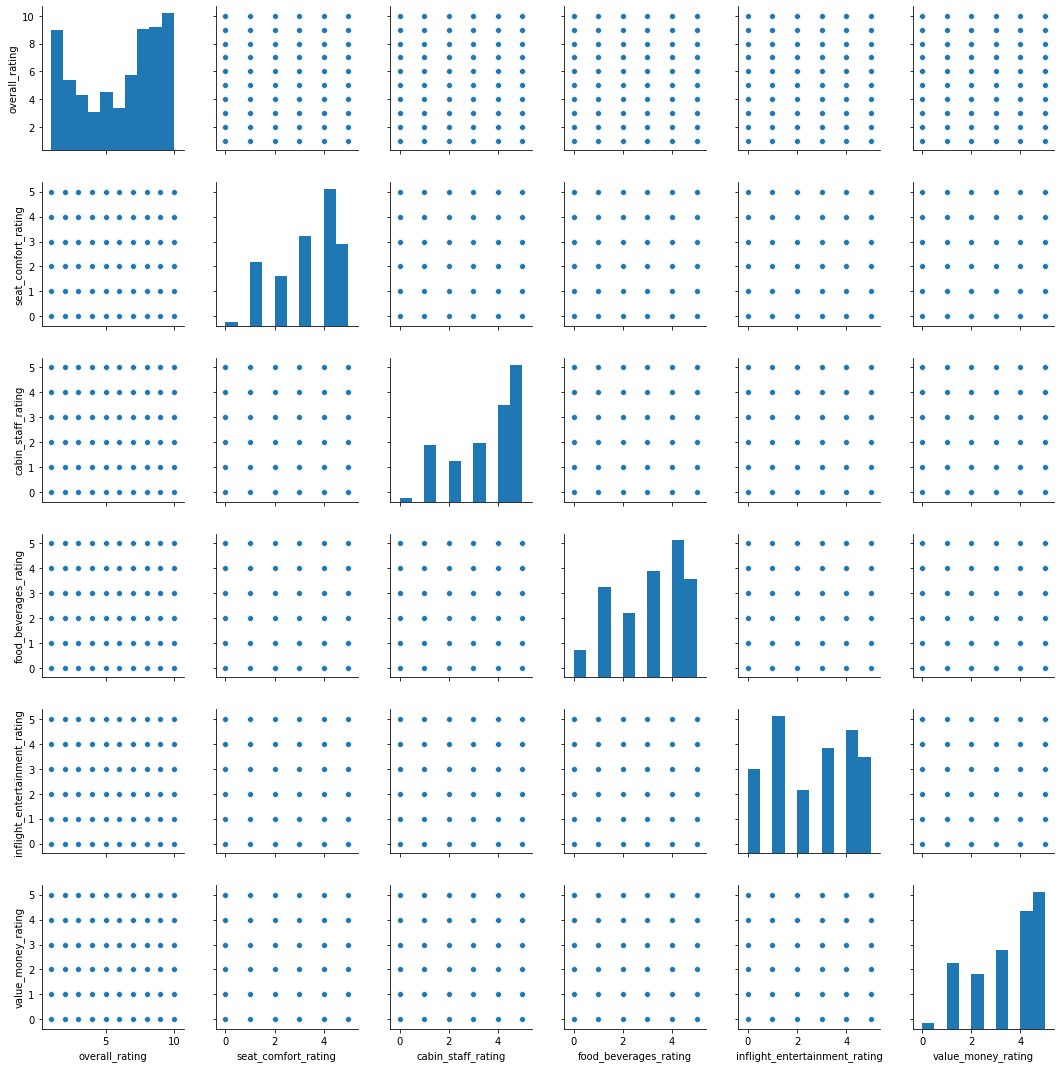

In [33]:
plt.figure(figsize=(11,9))
sns.pairplot(data3)
plt.show()

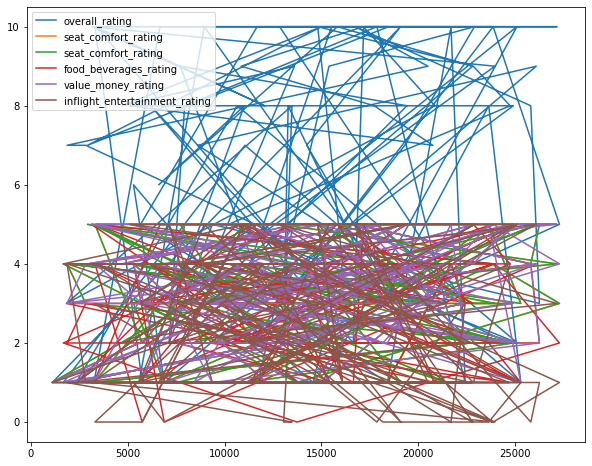

In [44]:
plt.figure(figsize=(10,8))
plt.plot(data4['overall_rating'] , label="overall_rating")
plt.plot(data4['seat_comfort_rating'] , label="seat_comfort_rating")
plt.plot(data4['seat_comfort_rating'] , label="seat_comfort_rating")
plt.plot(data4['food_beverages_rating'] , label="food_beverages_rating")
plt.plot(data4['value_money_rating'] , label="value_money_rating")
plt.plot(data4['inflight_entertainment_rating'] , label="inflight_entertainment_rating")
plt.legend()
plt.show()

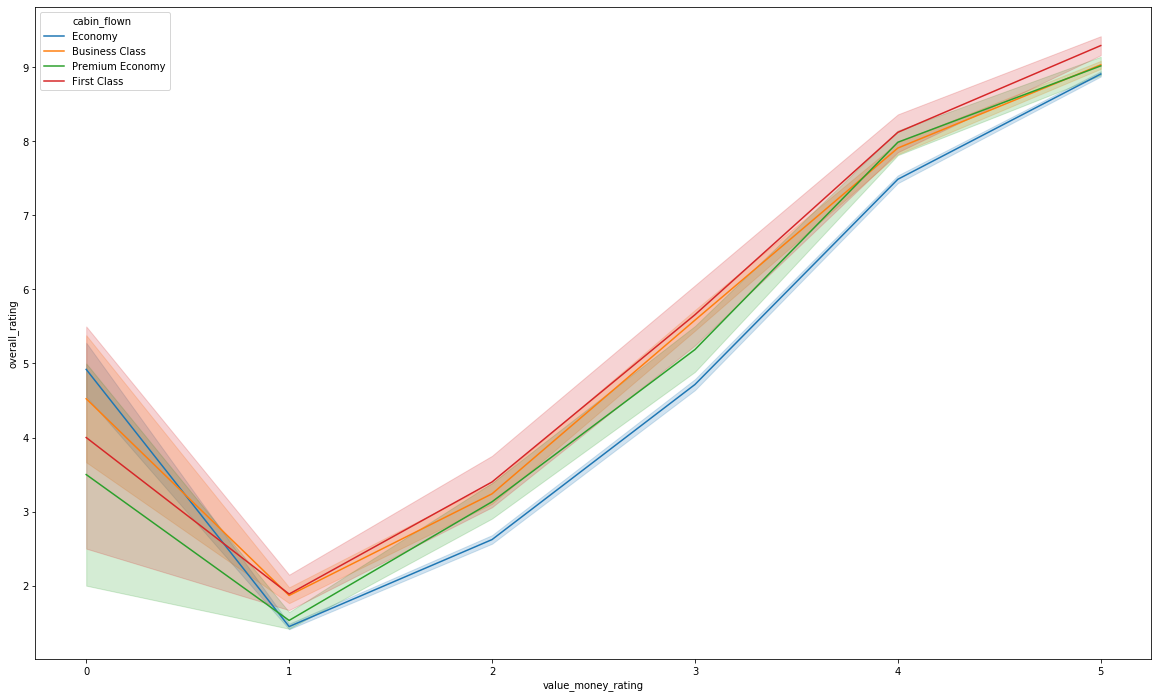

In [51]:
plt.figure(figsize=(20,12))
sns.lineplot(x=df['value_money_rating'] , y=df['overall_rating'] , hue=df['cabin_flown'] ) 
plt.legend()
plt.show()

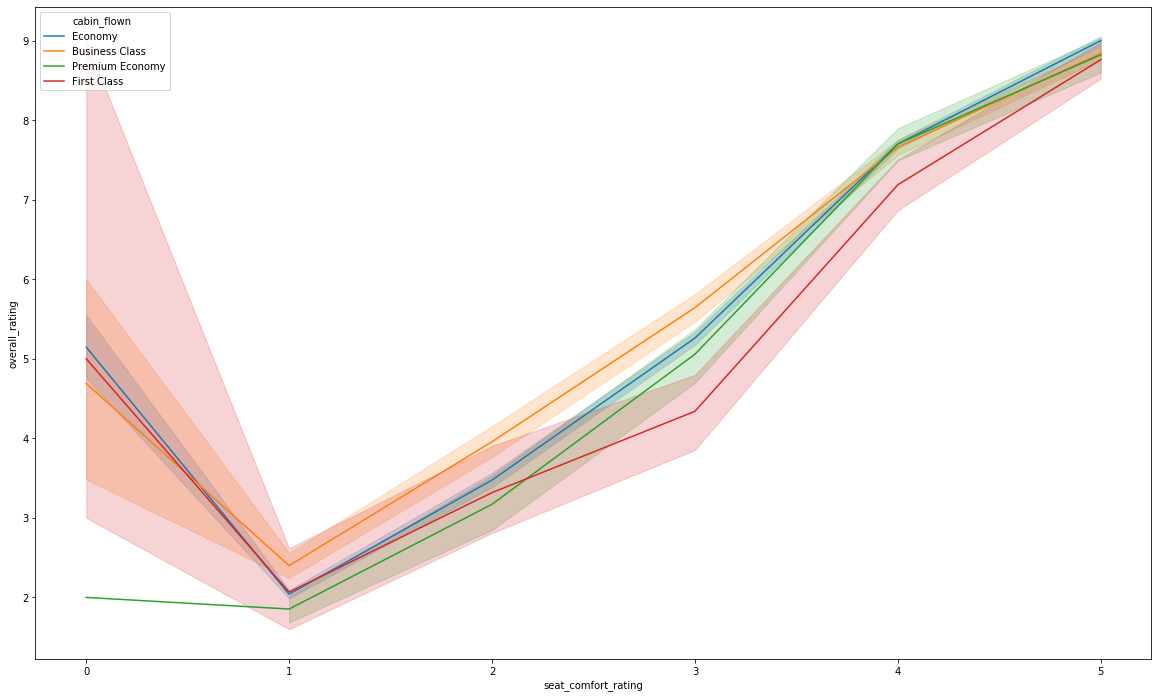

In [46]:
plt.figure(figsize=(20,12))
sns.lineplot(x=df['seat_comfort_rating'] , y=df['overall_rating'] , hue=df['cabin_flown'] ) 
plt.show()

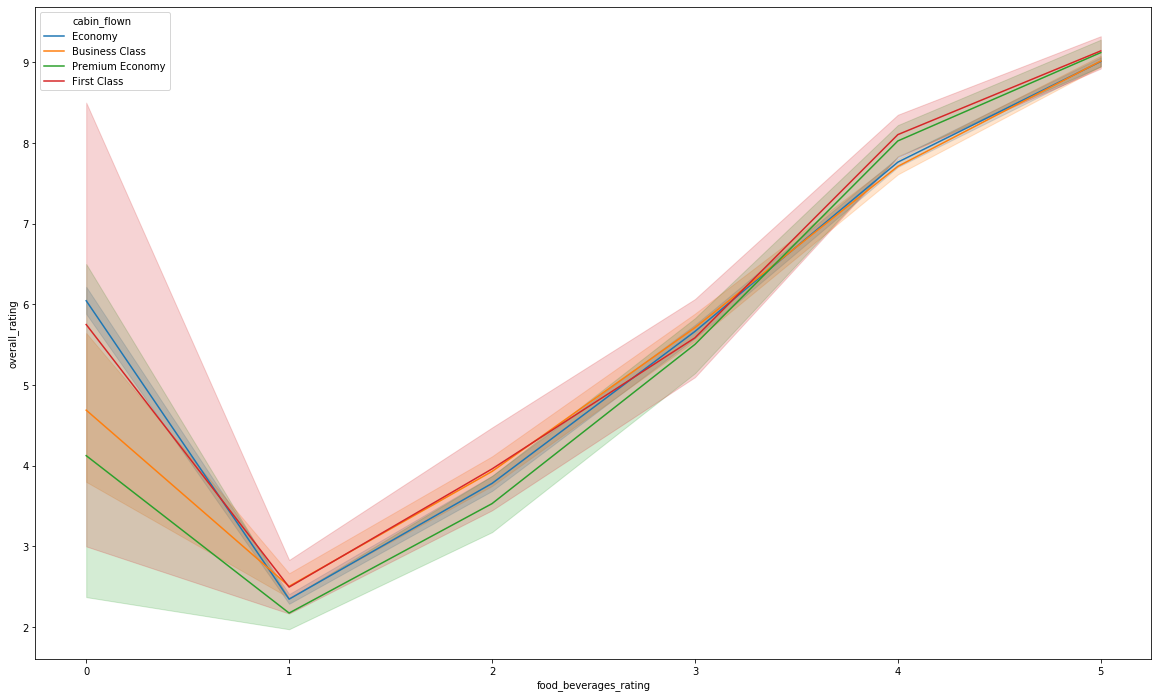

In [47]:
plt.figure(figsize=(20,12))
sns.lineplot(x=df['food_beverages_rating'] , y=df['overall_rating'] , hue=df['cabin_flown'] ) 
plt.show()

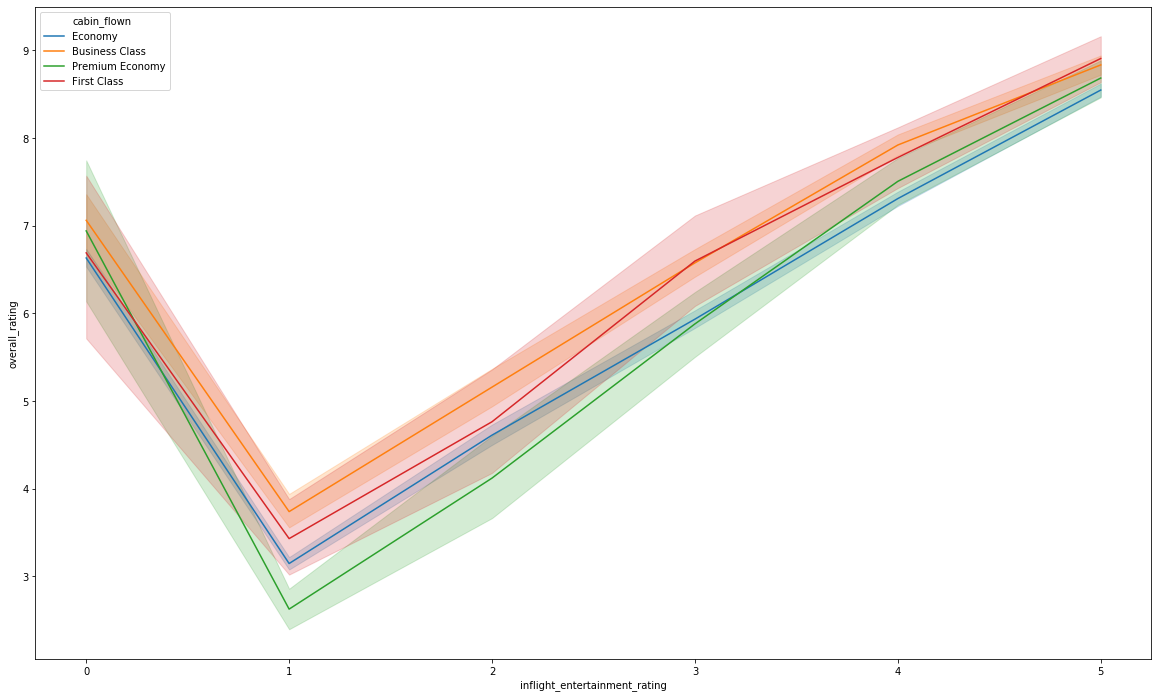

In [48]:
plt.figure(figsize=(20,12))
sns.lineplot(x=df['inflight_entertainment_rating'] , y=df['overall_rating'] , hue=df['cabin_flown'] ) 
plt.show()

Conclusion
Irrespective of the cabin flown all people expect value for money when estimating overall quality.

In [36]:
# plt.scatter(x="quality_of_education", y="score", color="country",size="citations")
# plt.show()

# Predicting best models

In [37]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
features = df.drop(['content', 'recommended', 'author', 'overall_rating'], axis=1)
features2 = df['content']
target = df['recommended']
target.value_counts()

1    16476
0    10808
Name: recommended, dtype: int64

In [39]:
features['author_country'] = LabelEncoder().fit_transform(features['author_country'])
features['cabin_flown'] = LabelEncoder().fit_transform(features['cabin_flown'])
features['airline_name'] = LabelEncoder().fit_transform(features['airline_name'])
features = StandardScaler().fit_transform(features)

In [40]:
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True, stop_words='english')
features2 = vectorizer.fit_transform(features2)
features2 = features2.toarray()
merge = np.concatenate((features2, features), axis=1)
merge.shape

(27284, 10365)

In [41]:
# clfs = {'DecisionTree': DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(),
#        'LogisticRegression': LogisticRegression(), 'SVM': SVC()}
# x = []
# y = []
# z = []
# for name, clf in clfs.items():
#     x.append({'Classifier': name, 'Features': 'Features 1', 'value': cross_val_score(clf, features, target, cv=5).mean()})
#     y.append({'Classifier': name, 'Features': 'Features 2', 'value': cross_val_score(clf, features2, target, cv=5).mean()})
#     z.append({'Classifier': name, 'Features': 'Features 3', 'value': cross_val_score(clf, merge, target, cv=5).mean()})
#     print (name)

In [42]:
# result = pd.DataFrame(columns=['Classifier', 'Features', 'value'])
# for i in range(4):
#     result = result.append(x[i], ignore_index=True)
#     result = result.append(y[i], ignore_index=True)
#     result = result.append(z[i], ignore_index=True)
# result

In [43]:
# ax, fig = plt.subplots(figsize=(10, 10))
# sns.pointplot(x="Classifier", y="value", hue="Features", data=result)